In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression     #for Model Building
from sklearn.metrics import confusion_matrix            #For Accuracy of Model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [3]:
#load Bankdata set
bank = pd.read_csv('C:/Users/Saroj Kumar Mohanty/OneDrive/Desktop/exclR assignments/Assignment/6 Logistic regression/bank-full-split.csv')

In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
#Top 10data 
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
#top 5 Last Rows
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#Dataset information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Describe bank dataset
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#check Number of rows and columns
bank.shape

(45211, 17)

In [10]:
#Check null data in Bank dataset
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='y'>

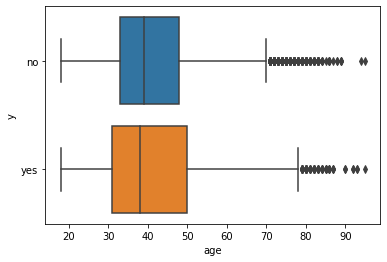

In [11]:
#Boxlot
sb.boxplot(x="age",y="y",data=bank)

<AxesSubplot:xlabel='y', ylabel='balance'>

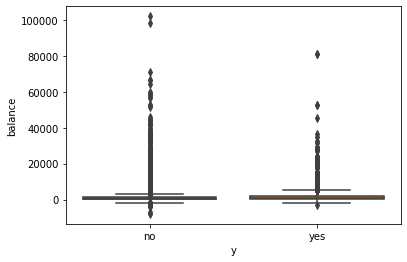

In [12]:
#box Plot
sb.boxplot(x="y",y="balance",data=bank)

<AxesSubplot:xlabel='y', ylabel='age'>

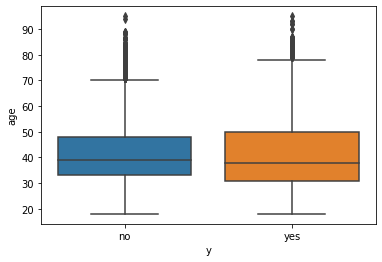

In [13]:
sb.boxplot(x="y",y="age",data=bank)

In [14]:
#drop Unnecesary column
bank.drop(["month"],inplace=True,axis=1)

In [15]:
#Drop Column
bank.drop(["day"],inplace=True,axis=1)

In [16]:
#check information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [17]:
#Convert binary information to 1 and 0
bank['y'] = np.where(bank['y'].str.contains("yes"), 1, 0)
bank['loan'] = np.where(bank['loan'].str.contains("yes"), 1, 0)
bank['housing'] = np.where(bank['housing'].str.contains("yes"), 1, 0)
bank['default'] = np.where(bank['default'].str.contains("yes"), 1, 0)

In [18]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0


<AxesSubplot:xlabel='y', ylabel='count'>

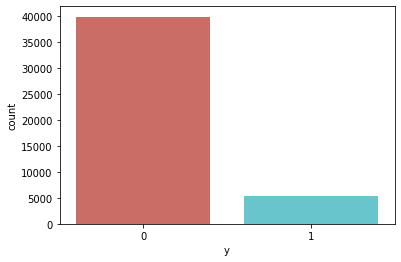

In [19]:
#Count plot of Target Variable
sb.countplot(x='y',data=bank,palette='hls')

In [20]:
# One-Hot Encoding of categrical variables
df=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [21]:
# To see all columns
pd.set_option("display.max.columns",None)
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [22]:
#check Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   y                    45211 non-null  int32
 10  job_admin.           45211 non-null  uint8
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [23]:
# Model building 
from sklearn.linear_model import LogisticRegression
df.shape 

(45211, 36)

In [24]:
X = pd.concat([df.iloc[:,0:9],df.iloc[:,10:]],axis=1)
Y = df.iloc[:,9]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# coefficients of features
classifier.coef_  

array([[-2.15516751e-03, -1.14594282e-01,  1.73669905e-05,
        -7.86930079e-01, -5.61565743e-01,  4.02782627e-03,
        -1.11378712e-01,  1.69989270e-04,  1.05249907e-02,
         7.02515729e-02, -2.96353882e-01, -3.26825434e-01,
        -3.35627316e-01, -1.30214890e-01,  5.06581232e-01,
        -2.81197750e-01, -2.45831420e-01,  4.62793846e-01,
        -1.83373385e-01, -1.30825496e-01, -7.70608961e-02,
        -3.07325404e-01, -4.85138440e-01, -1.75219975e-01,
        -4.68799371e-01, -2.95270240e-01, -5.21499759e-02,
        -1.51464232e-01,  8.33519658e-02,  1.94643871e-02,
        -1.07050017e+00, -8.03126520e-01, -5.79875528e-01,
         1.47651662e+00, -1.06119839e+00]])

In [26]:
#Check Prediction
y_pred = classifier.predict(X)
df["y_pred"] = y_pred
df

C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1
45207,71,0,1729,0,0,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
45208,72,0,5715,0,0,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [27]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([df,y_prob],axis=1)
new_df  

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred,0,1
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0.975917,0.024083
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0.984293,0.015707
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0.995643,0.004357
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.990391,0.009609
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0.947264,0.052736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0.301724,0.698276
45207,71,0,1729,0,0,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.673554,0.326446
45208,72,0,5715,0,0,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0.013285,0.986715
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0.831595,0.168405


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39007   915]
 [ 3587  1702]]


In [29]:
pd.crosstab(y_pred,Y)  

y,0,1
row_0,,
0,39007,3587
1,915,1702


In [30]:
accuracy = sum(Y==y_pred)/df.shape[0]
accuracy 

0.9004224635597532

In [31]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.6494401343917672

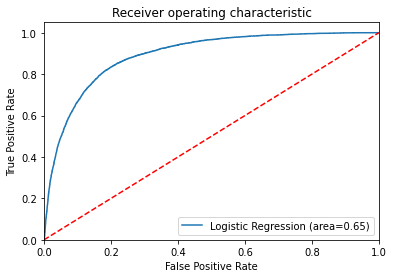

In [33]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [34]:
import statsmodels.api as sm

C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
logit = sm.Logit(Y, X)  

In [36]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.249986
         Iterations 9


C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45180
Method:                           MLE   Df Model:                           30
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.3073
Time:                        22:13:39   Log-Likelihood:                -11302.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0016      0.002      0.722      0.470      -0.003       0.006
default                -0.1659      0.161     -1.028      0.304      -0.482       0.150
balance              1.762e-05   4.86e-06      3.626      0.000     8.1e-06    2.71e-05
housing                -0.7689      0.040    -19.435      0.000      -0.846      -0.691
loan                   -0.5633      0.058     -9.678      0.000      -0.677      -0.449
duration                0.0041   6.27e-05     64.617      0.000       0.004       0.004
campaign               -0.1095      0.010    -11.053      0.000      -0.129      -0.090
pdays                   0.0002      0.000      0.648      0.517      -0.000       0.001
previous                0.0106      0.007      1.625      0.104      -0.002       0.023
job_admin.              0.0334    8.3e+05   4.02e-08      1.000   -1.63e+06    1.63e+06
job_blue-collar        -0.3593    8.3e+05  -4.33e-07      1.000   -1.63e+06    1.63e+06
job_entrepreneur       -0.4521    8.3e+05  -5.45e-07      1.000   -1.63e+06    1.63e+06
job_housemaid          -0.4932    8.3e+05  -5.94e-07      1.000   -1.63e+06    1.63e+06
job_management         -0.1953    8.3e+05  -2.35e-07      1.000   -1.63e+06    1.63e+06
job_retired             0.3744    8.3e+05   4.51e-07      1.000   -1.63e+06    1.63e+06
job_self-employed      -0.3490    8.3e+05   -4.2e-07      1.000   -1.63e+06    1.63e+06
job_services           -0.2785    8.3e+05  -3.36e-07      1.000   -1.63e+06    1.63e+06
job_student             0.5378    8.3e+05   6.48e-07      1.000   -1.63e+06    1.63e+06
job_technician         -0.2397    8.3e+05  -2.89e-07      1.000   -1.63e+06    1.63e+06
job_unemployed         -0.1861    8.3e+05  -2.24e-07      1.000   -1.63e+06    1.63e+06
job_unknown            -0.3043    8.3e+05  -3.67e-07      1.000   -1.63e+06    1.63e+06
marital_divorced       -0.6382        nan        nan        nan         nan         nan
marital_married        -0.7968        nan        nan        nan         nan         nan
marital_single         -0.4770        nan        nan        nan         nan         nan
education_primary      -0.6883   5.97e+05  -1.15e-06      1.000   -1.17e+06    1.17e+06
education_secondary    -0.5219   5.97e+05  -8.75e-07      1.000   -1.17e+06    1.17e+06
education_tertiary     -0.2846   5.97e+05  -4.77e-07      1.000   -1.17e+06    1.17e+06
education_unknown      -0.4172   5.97e+05  -6.99e-07      1.000   -1.17e+06    1.17e+06
contact_cellular       -0.2244   9.47e+05  -2.37e-07      1.000   -1.86e+06    1.86e+06
contact_telephone      -0.3075   9.47e+05  -3.25e-07      1.000   -1.86e+06    1.86e+06
contact_unknown        -1.3801   9.47e+05  -1.46e-06      1.000   -1.86e+06    1.86e+06
poutcome_failure       -1.0542        nan        nan        nan         nan         nan
poutcome_other         -0.8052        nan        nan        nan         nan         nan
poutcome_success        1.2441        nan        nan        nan         n